# An example using Feature weighted ECM clustering


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


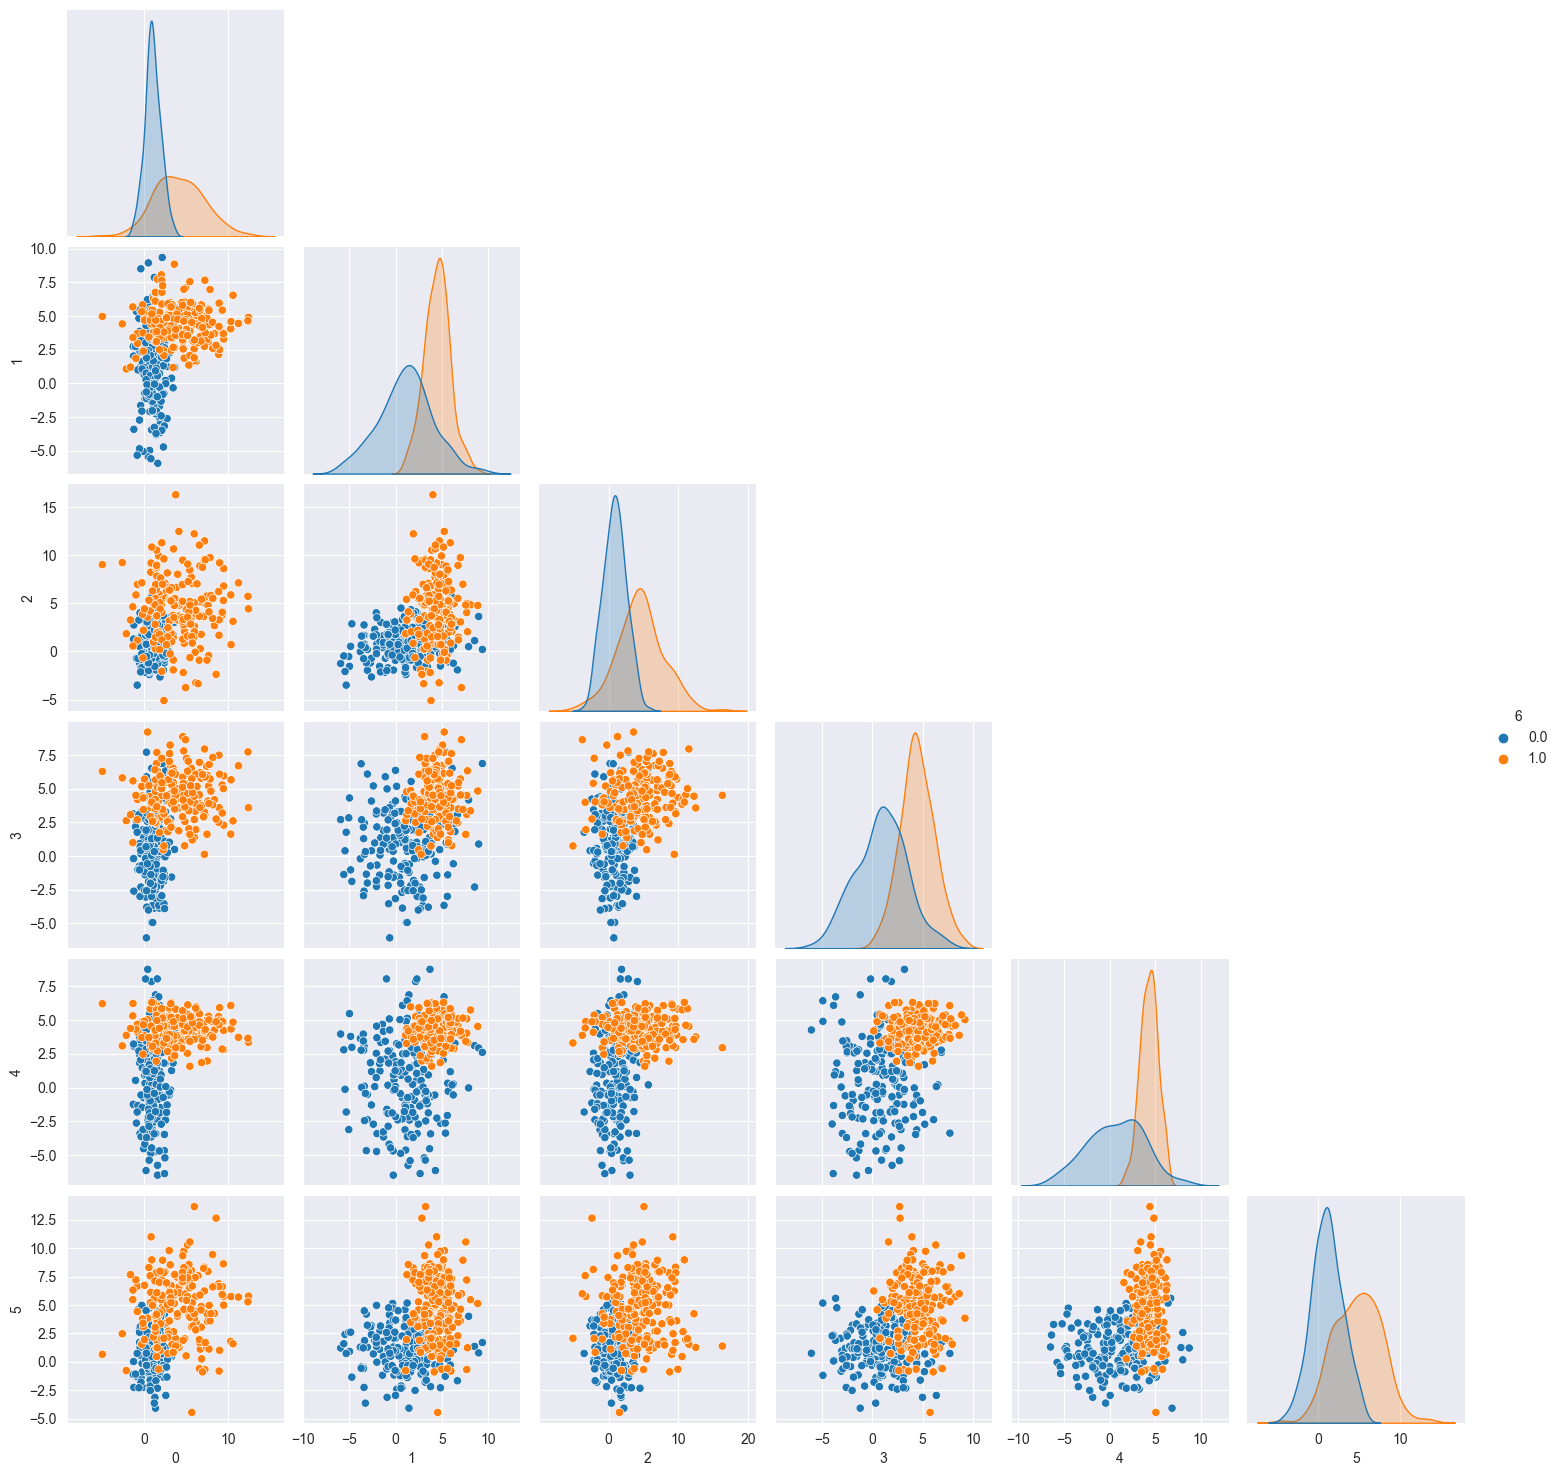

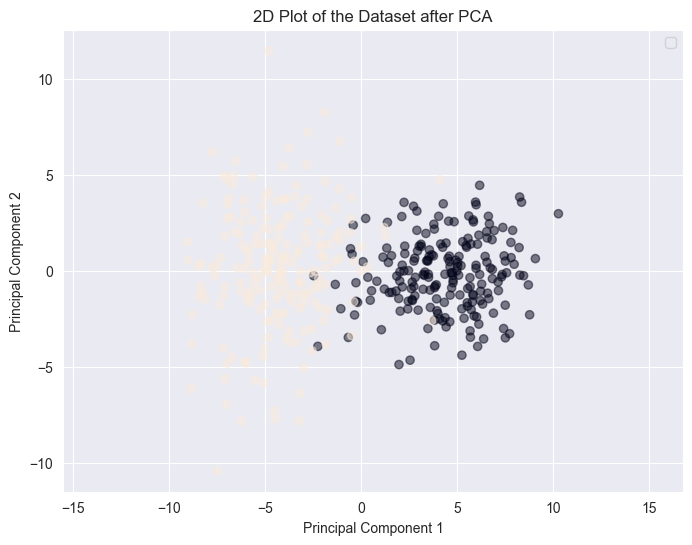

In [2]:
## Generating data set
# Number of points in each cluster
num_points = 200

# Number of dimensions for each point
num_dimensions = 6

# Mean and covariance matrices for each cluster
identity = np.eye(6)
cov_matrix1 = np.array([1, 8, 3, 7, 9, 4]).reshape((6, 1)) * identity
cov_matrix2 = np.array([9, 2, 9, 3, 1, 8]).reshape((6, 1)) * identity

cluster_params = [
    {"mean": [1, 1, 1, 1, 1, 1], "covariance": cov_matrix1, "label": 0},
    {"mean": [4.5, 4.5, 4.5, 4.5, 4.5, 4.5], "covariance": cov_matrix2, "label": 1},
]

# Generate data for each cluster
# data = np.concatenate([np.random.multivariate_normal(params["mean"], params["covariance"], num_points) for params in cluster_params])
dataset = np.concatenate(
    [np.column_stack((np.random.multivariate_normal(params["mean"], params["covariance"], num_points),
                      np.full((num_points, 1), params["label"]))) for params in cluster_params])
df = pd.DataFrame(data=dataset[:, :-1])

# Scatter matrix plot
df_wt_label = pd.DataFrame(dataset)
sns.pairplot(df_wt_label, corner=True, hue=df_wt_label.columns[-1])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(dataset[:, :-1])

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=dataset[:, -1])
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [6]:
df_full = pd.DataFrame(data=dataset)
df_full.to_csv('D:/vtdo/projects/evclust/src/evclust/datasets/2c6dDataset.csv', index=False, header=False)

## Traditional ECM

[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977013]
[7, 7371.563707582087]
[   0.         7371.56370758 7371.56370758]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977014]
[7, 7371.563707582087]
[1.00000000e+00 7.37156371e+03 7.37156371e+03]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977013]
[7, 7371.563707582087]
[2.00000000e+00 7.37156371e+03 7.37156371e+03]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977013]
[7, 7371.563707582087]
[3.00000000e+00 7.37156371e+03 7.37156371e+03]
[1, 7381.050114467496]
[2, 7372.505185545321]
[3, 7371.695245326016]
[4, 7371.584060745266]
[5, 7371.567000045885]
[6, 7371.564188977014]
[7, 7371.563707582087]
[4.0000000

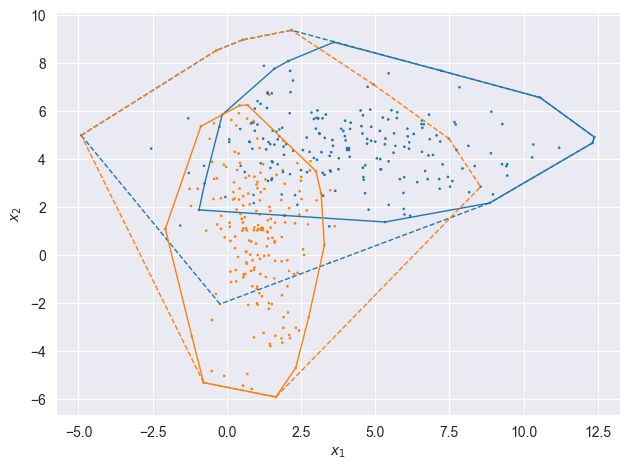

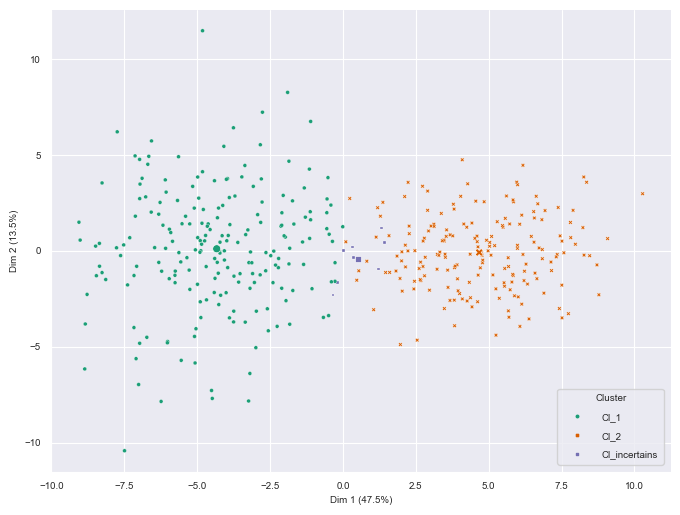

----------Traditional ECM----------
Jbest: 7371.563707582087
Centers: 
 [[4.06567188 4.41229781 4.53199571 4.36354126 4.21113979 4.8407582 ]
 [1.17807464 1.08405924 0.83248637 0.8785827  0.6475053  1.09442912]]
Adjusted Rand Index (ARI): 0.8368165198486512
Maximum Non-specificity value: 2.0356668048823607
Minimum Non-specificity value: 0.14974585923625783
Average Non-specificity value: 0.9830444150216857
Average Normalized Non-specificity value: 0.9830444150216857


In [12]:
# Traditional ECM clustering
model = ecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=10)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

Initial weights: 
 [[0.13792264 0.24030843 0.09318587 0.17356215 0.13044615 0.22457475]
 [0.19931167 0.09494171 0.16096384 0.1729821  0.15321458 0.2185861 ]]
---------Iteration #1---------
Initial prototypes: 
 [[1.04095644 0.85934701 0.69129092 0.80010091 0.57173923 1.02006478]
 [4.08749483 4.5496216  4.52771548 4.38792444 4.31742738 4.74372542]]
[1, 226.51412976691088]
[2, 206.1909145089686]
[3, 205.81100277380418]
[4, 205.77362887010884]
[5, 205.76912913538393]
[6, 205.76858280186408]
[  0.        205.7685828 205.7685828]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[1.04095644 0.85934701 0.69129092 0.80010091 0.57173923 1.02006478]
 [4.08749483 4.5496216  4.52771548 4.38792444 4.31742738 4.74372542]]
[1, 226.51412976691088]
[2, 206.1909145089686]
[3, 205.81100277380418]
[4, 205.77362887010884]
[5, 205.76912913538393]
[6, 205.76858280186408]
[  1.        205.7685828 205.7685828]
---------End Iteration #2---------
---------Iteration #3-----

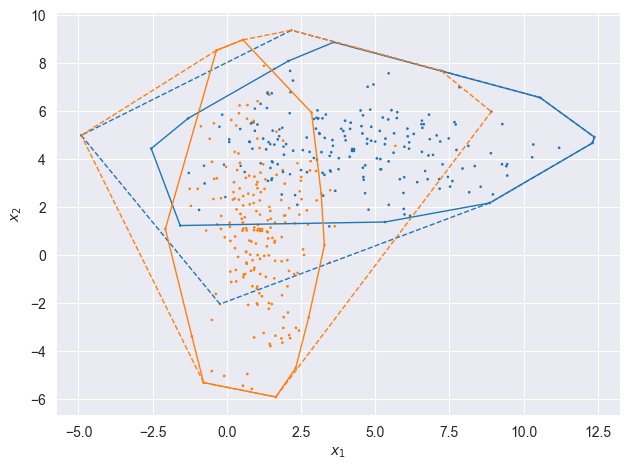

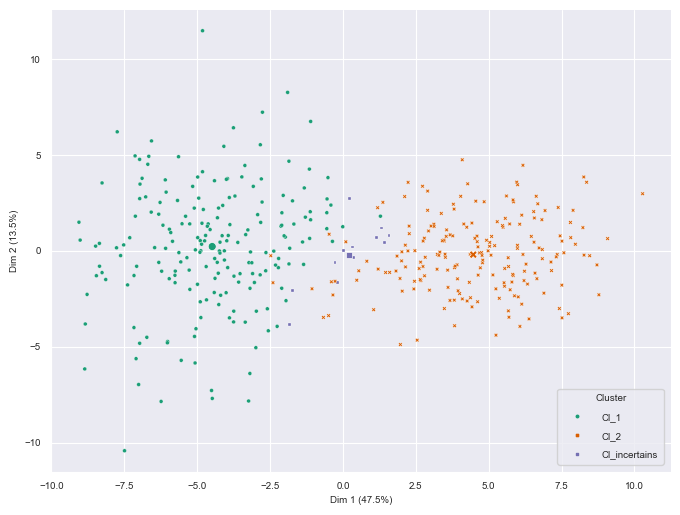

Covariance matrix 1: 
 [[1. 0. 0. 0. 0. 0.]
 [0. 8. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 9. 0.]
 [0. 0. 0. 0. 0. 4.]] 
 Covariance matrix 2:
 [[9. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]
 [0. 0. 9. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 8.]]


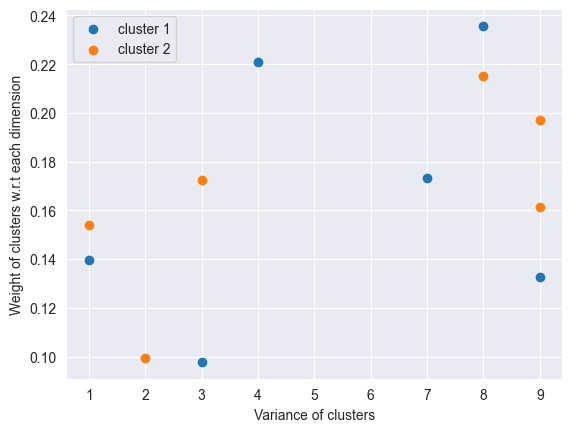

In [11]:
# Feature weighted ECM clustering
W = np.array([
    [0.13792264, 0.24030843, 0.09318587, 0.17356215, 0.13044615, 0.22457475],
    [0.19931167, 0.09494171, 0.16096384, 0.1729821, 0.15321458, 0.2185861]
])
c = 2
model = wecm(x=df, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Weighted ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")
print(f"Final weights: \n {model['W']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plotting
ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

W = model['W']
print(f"Covariance matrix 1: \n {cov_matrix1} \n Covariance matrix 2:\n {cov_matrix2}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': np.diag(cov_matrix1)})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': np.diag(cov_matrix2)})
W_COV_2.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label="cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label="cluster 2", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)